In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))



In [3]:

data = pd.read_csv('fire_nrt_V1_96617.csv')
data.columns

Index(['latitude', 'longitude', 'bright_ti4', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_ti5', 'frp', 'daynight'],
      dtype='object')

In [4]:
data.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
0,-42.69706,147.70634,333.6,0.57,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.4,4.0,D
1,-42.26889,147.31104,336.2,0.39,0.44,2019-10-01,336,N,VIIRS,n,1.0NRT,296.9,3.9,D
2,-40.85202,145.38068,327.9,0.46,0.47,2019-10-01,336,N,VIIRS,n,1.0NRT,295.3,3.7,D
3,-42.39329,147.47144,346.9,0.38,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,294.2,6.2,D
4,-42.69701,147.70584,334.1,0.56,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.5,4.1,D


# Task 1

1.1.1 - Using the matplotlib defaults.

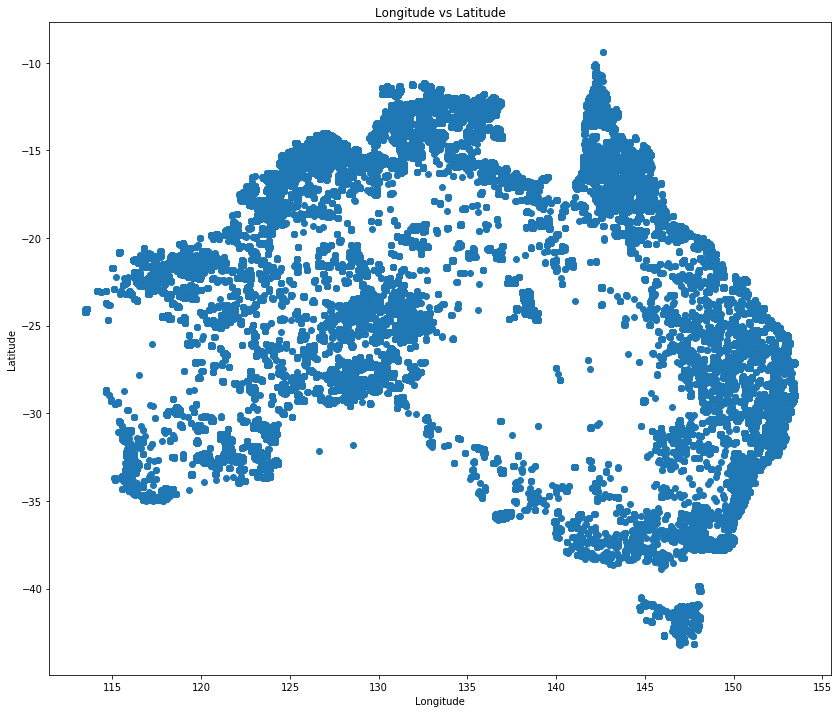

In [5]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 14
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

latitude = data['latitude']
longitude = data['longitude']


plt.title('Longitude vs Latitude')
plt.scatter(longitude, latitude)
plt.xlabel('Longitude')
plt.ylabel('Latitude')


plt.show()

  

1.1.2 - Adjusting alpha and marker size to compensate for overplotting.

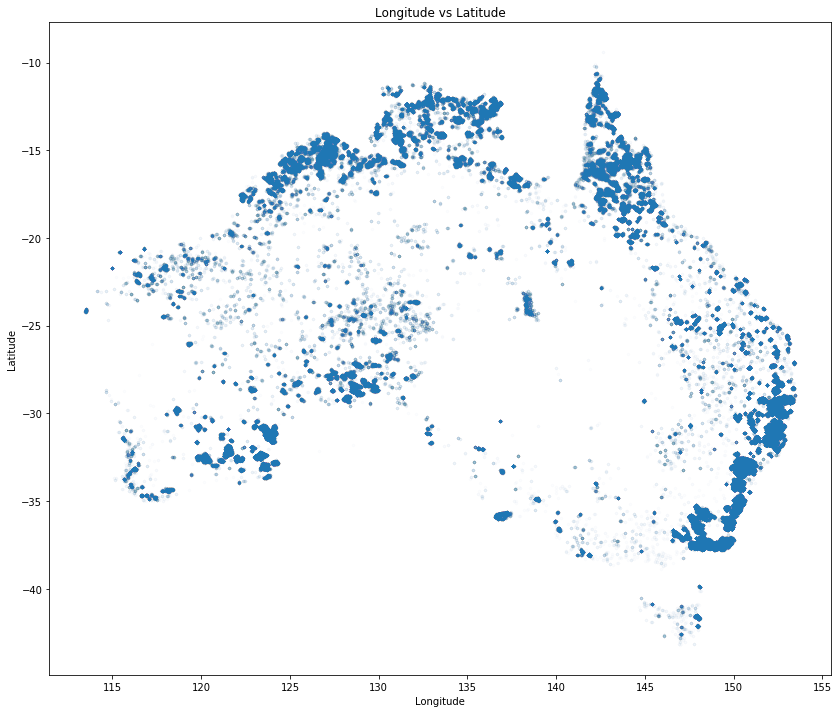

In [6]:
plt.title('Longitude vs Latitude')
plt.scatter(longitude, latitude, s = 8, alpha = 0.01)
plt.xlabel('Longitude')
plt.ylabel('Latitude')


plt.show()


1.1.3 - Using a hexbin plot

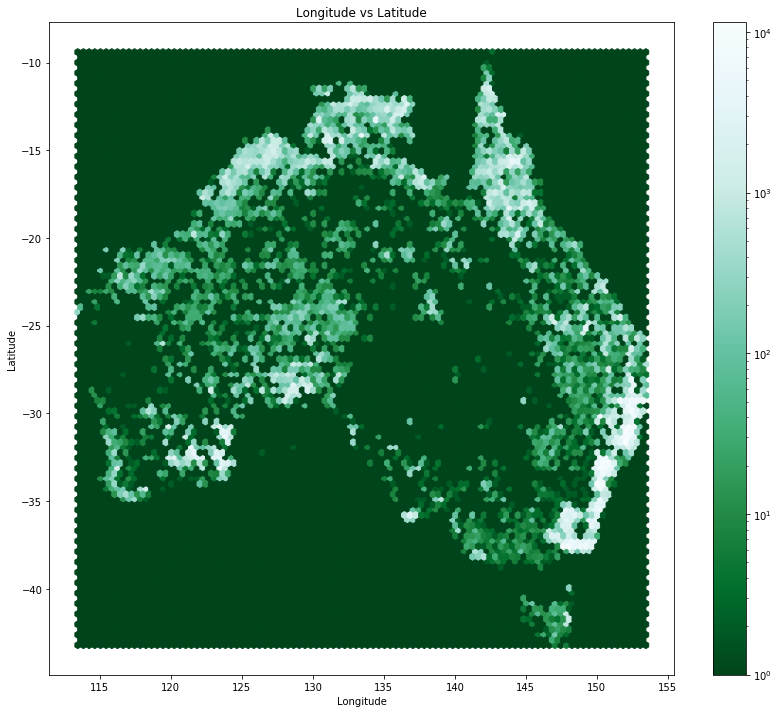

In [7]:
plt.title('Longitude vs Latitude')
plt.hexbin(longitude, latitude, bins = 'log', cmap=plt.cm.BuGn_r)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar()

plt.show()


1.1.4 - Sampling

[Text(0, 0.5, 'Latitude')]

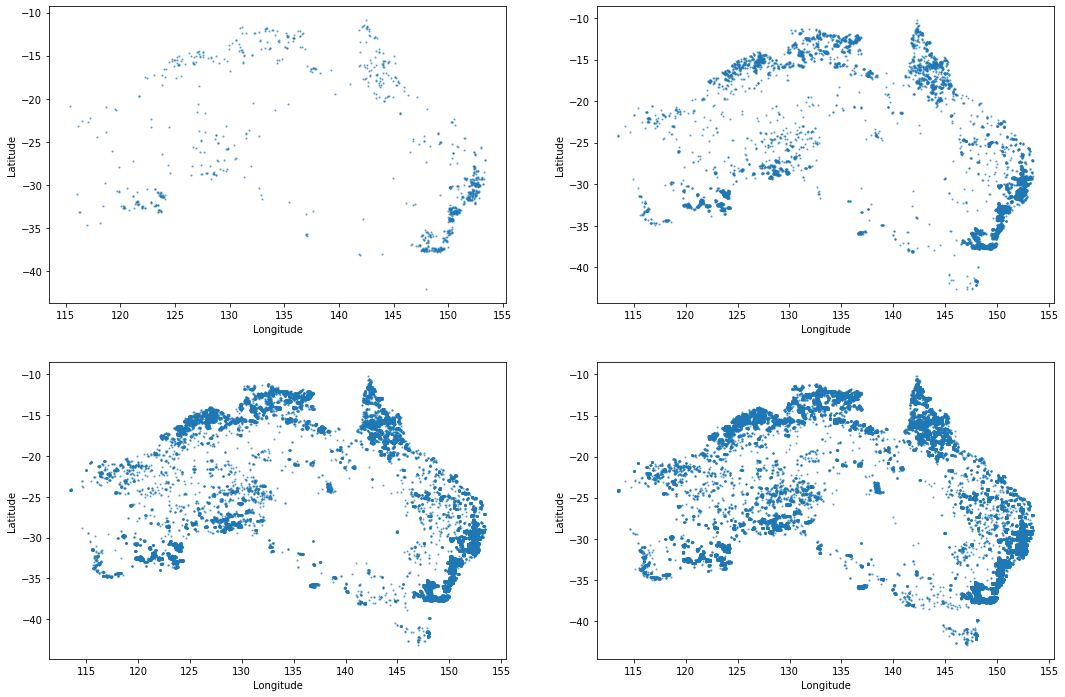

In [8]:

df1 = data.sample(1000)
df1_latitude = df1['latitude']
df1_longitude = df1['longitude']


df2 = data.sample(10000)
df2_latitude = df2['latitude']
df2_longitude = df2['longitude']

df3 = data.sample(50000)
df3_latitude = df3['latitude']
df3_longitude = df3['longitude']

df4 = data.sample(100000)
df4_latitude = df4['latitude']
df4_longitude = df4['longitude']


fig, ax = plt.subplots(2,2, figsize=(18, 12))

ax[0,0].scatter(df1_longitude, df1_latitude, marker = '.', s = 6, alpha = 0.5)
ax[0,1].scatter(df2_longitude, df2_latitude, marker = '.', s = 6, alpha = 0.5)
ax[1,0].scatter(df3_longitude, df3_latitude, marker = '.', s = 6, alpha = 0.5)
ax[1,1].scatter(df4_longitude, df4_latitude, marker = '.', s = 6, alpha = 0.5)


ax[0,0].set(xlabel = 'Longitude')
ax[0,0].set(ylabel = 'Latitude')
ax[0,1].set(xlabel = 'Longitude')
ax[0,1].set(ylabel = 'Latitude')
ax[1,0].set(xlabel = 'Longitude')
ax[1,0].set(ylabel = 'Latitude')
ax[1,1].set(xlabel = 'Longitude')
ax[1,1].set(ylabel = 'Latitude')


Sampling in pandas, randomly selects some data from the given dataset.
Here I have tried to sample data with different sample sizes like 1000,10000,50000 and 100000. All these help us have a better understanding of the underlying trend with less overlapping points. 


1.2 - From the above samples we can see that most of the anomalies are located along the coastal regions of Australia. That includes the eastern part of New South Wales and Victoria states and in the northern parts of Queensland, Northern Territory and Western Australia. Also some of the southern parts of Western Australia seems to be affected as well.

# Task 2

Visualize the distribution of Brightness temperature I-4 as a histogram

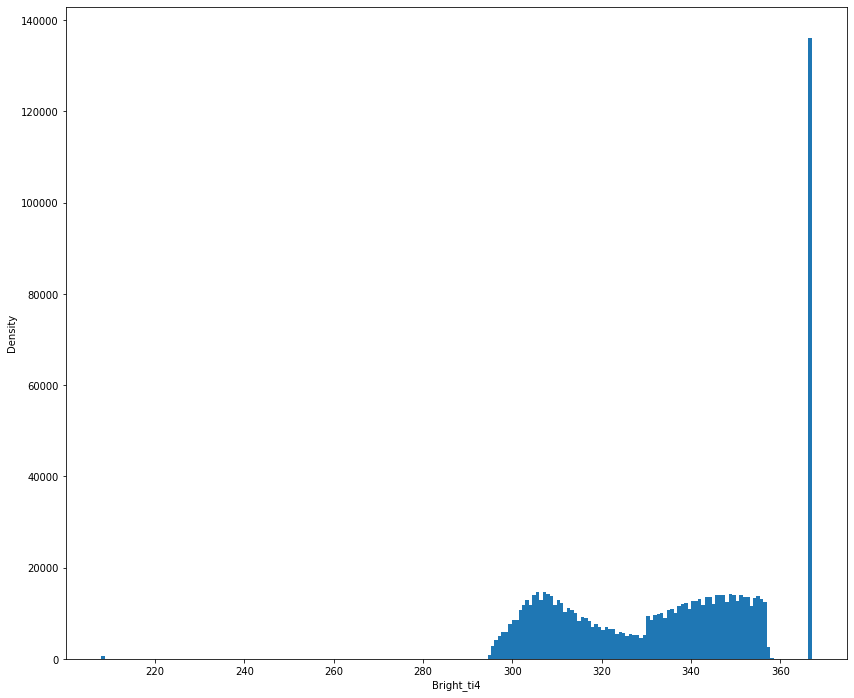

In [9]:
bright_ti4 = data['bright_ti4']

plt.hist(bright_ti4, bins= "auto")

plt.xlabel('Bright_ti4')
plt.ylabel('Density')
plt.show()



2.1 - All those high confidence fire pixels are saturated and their Brightness Temperature I-4 = 367.0

[Text(0, 0.5, 'Latitude')]

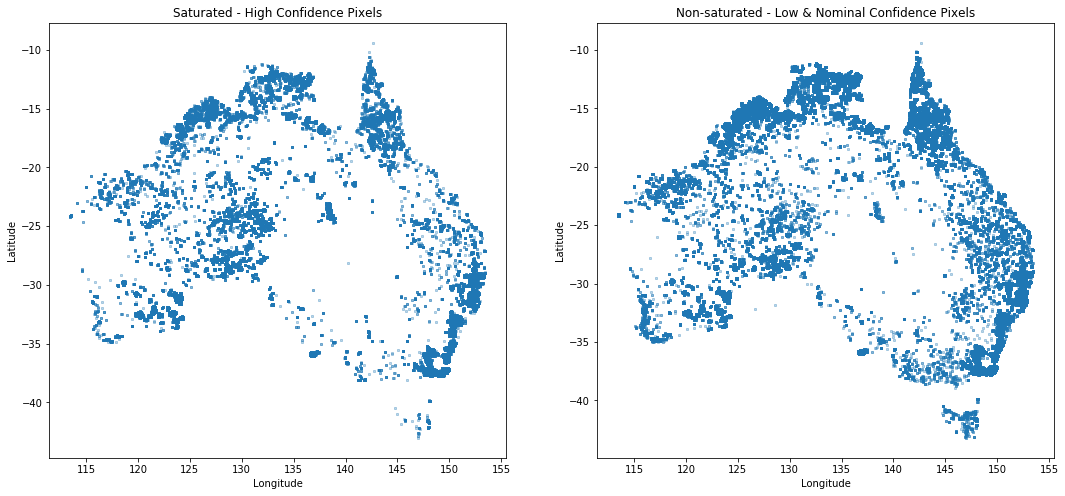

In [10]:
saturated_bright = data[data.bright_ti4 == 367.0]
s_latitude = saturated_bright['latitude']
s_longitude = saturated_bright['longitude']


unsaturated_bright = data[data.bright_ti4 != 367.0]
u_latitude = unsaturated_bright['latitude']
u_longitude = unsaturated_bright['longitude']


fig, ax = plt.subplots(1, 2, figsize=(18, 8))

ax[0].scatter(s_longitude, s_latitude, marker = ',', s = 6, alpha = 0.3)
ax[1].scatter(u_longitude, u_latitude, marker = ',', s = 6, alpha = 0.3)
ax[0].set_title('Saturated - High Confidence Pixels')
ax[1].set_title('Non-saturated - Low & Nominal Confidence Pixels')
ax[0].set(xlabel = 'Longitude')
ax[0].set(ylabel = 'Latitude')
ax[1].set(xlabel = 'Longitude')
ax[1].set(ylabel = 'Latitude')



We can now see the actual places that are affected by avoiding the non-saturated pixels.

# 2.2

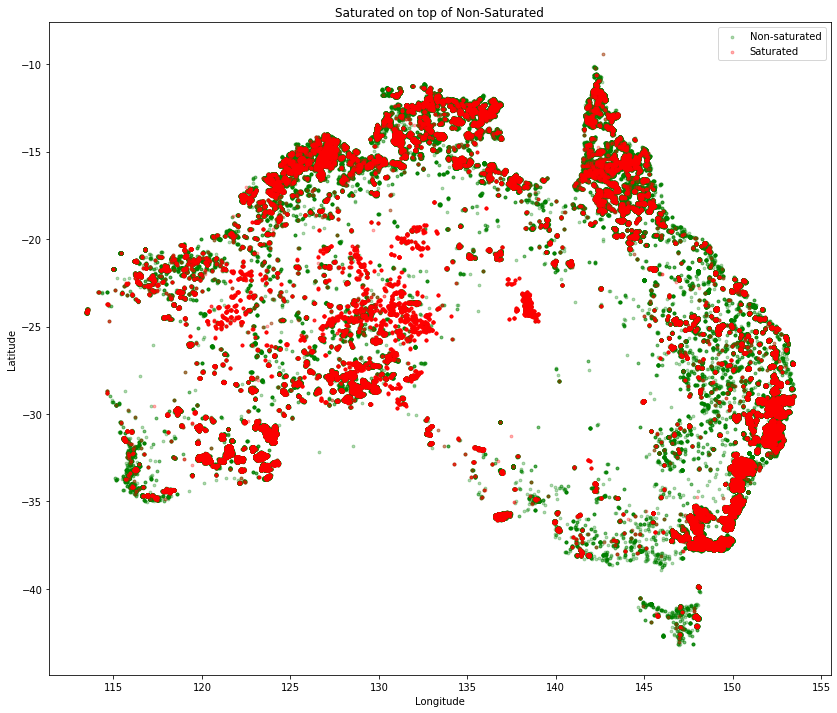

In [11]:
unsaturated_bright = data[data.bright_ti4 != 367.0]
u_latitude = unsaturated_bright['latitude']
u_longitude = unsaturated_bright['longitude']

saturated_bright = data[data.bright_ti4 == 367.0]
s_latitude = saturated_bright['latitude']
s_longitude = saturated_bright['longitude']

fig, ax = plt.subplots(1, 1, figsize=(14, 12))
ax.scatter(u_longitude,u_latitude, color='green', s = 8, alpha = 0.3, label="Non-saturated")
ax.scatter(s_longitude,s_latitude, color='red', s = 8, alpha = 0.3, label="Saturated")
ax.set(xlabel = 'Longitude')
ax.set(ylabel = 'Latitude')
ax.set_title('Saturated on top of Non-Saturated')
ax.legend()
plt.show()

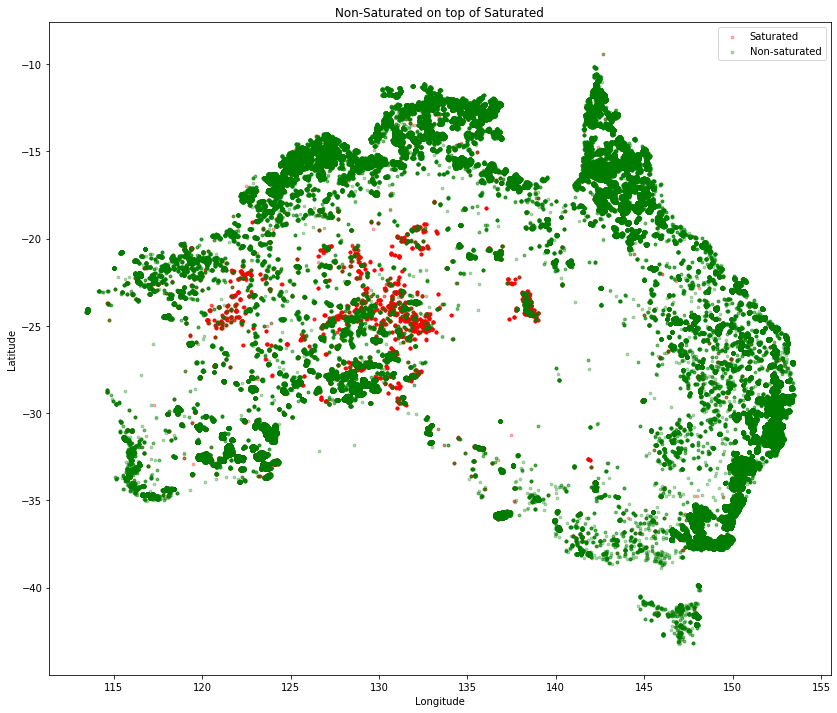

In [12]:
unsaturated_bright = data[data.bright_ti4 != 367.0]
u_latitude = unsaturated_bright['latitude']
u_longitude = unsaturated_bright['longitude']

saturated_bright = data[data.bright_ti4 == 367.0]
s_latitude = saturated_bright['latitude']
s_longitude = saturated_bright['longitude']

fig, ax = plt.subplots(1, 1, figsize=(14, 12))
ax.scatter(s_longitude,s_latitude, color='red', s = 8, alpha = 0.3, label="Saturated")
ax.scatter(u_longitude,u_latitude, color='green', s = 8, alpha = 0.3, label="Non-saturated")
ax.set(xlabel = 'Longitude')
ax.set(ylabel = 'Latitude')
ax.set_title('Non-Saturated on top of Saturated')
ax.legend()
plt.show()

Plotting the Non-saturated points on top of Saturated points almost covers all the saturated points due to overplotting of the non-saturated points. This would prevent us from seeing the actual places that are affected due to fire. 

2.3 - Tried the below methods to see the saturated and unsaturated distributions in different ways.

Text(0, 0.5, 'Latitude')

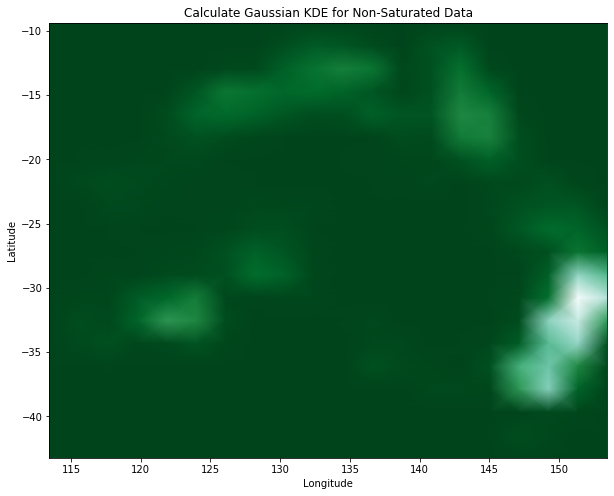

In [13]:
from scipy.stats import kde
nbins = 20



unsaturated_bright = data[data.bright_ti4 != 367.0]
d_dense = unsaturated_bright[['longitude', 'latitude']]
d_dense = d_dense.to_numpy()
d_dense = d_dense.T

fig, ax = plt.subplots(1,1, figsize=(10, 8))

x,y= d_dense


k = kde.gaussian_kde(d_dense)
xi, yi= np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

ax.set_title('Calculate Gaussian KDE for Non-Saturated Data')
ax.pcolormesh(xi, yi,zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')




Text(0, 0.5, 'Latitude')

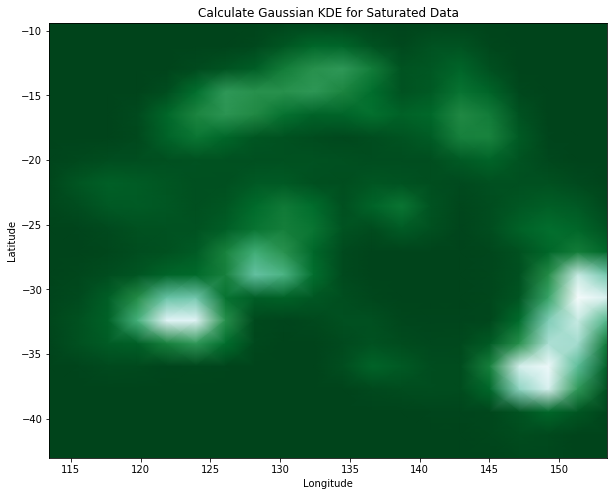

In [14]:
from scipy.stats import kde
nbins = 20



saturated_bright = data[data.bright_ti4 == 367.0]
d_dense = saturated_bright[['longitude', 'latitude']]
d_dense = d_dense.to_numpy()
d_dense = d_dense.T

fig, ax = plt.subplots(1,1, figsize=(10, 8))

x,y= d_dense


k = kde.gaussian_kde(d_dense)
xi, yi= np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

ax.set_title('Calculate Gaussian KDE for Saturated Data')
ax.pcolormesh(xi, yi,zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# The 1D Histogram below over Brightness Temperature I-4 seems to give a better understanding than other plots.

Text(0, 0.5, 'Density')

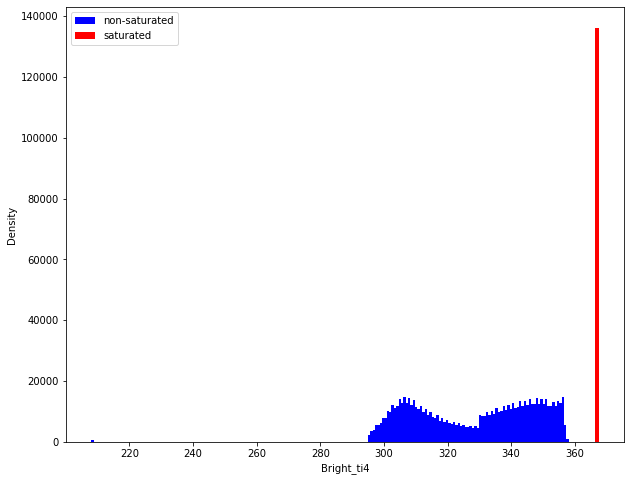

In [8]:


fig, ax = plt.subplots(1,1, figsize=(10, 8))

saturated_bright = data[data.bright_ti4 == 367.0]
unsaturated_bright = data[data.bright_ti4 != 367.0]

u_bright = unsaturated_bright['bright_ti4']
s_bright = saturated_bright['bright_ti4']

ax.hist(u_bright,color='b', bins='auto',label='non-saturated')
ax.hist(s_bright,color='r', bins='auto',label = 'saturated')

ax.legend()

ax.set_xlabel('Bright_ti4')
ax.set_ylabel('Density')




Just tried plotting the saturated and non-saturated using hexbins

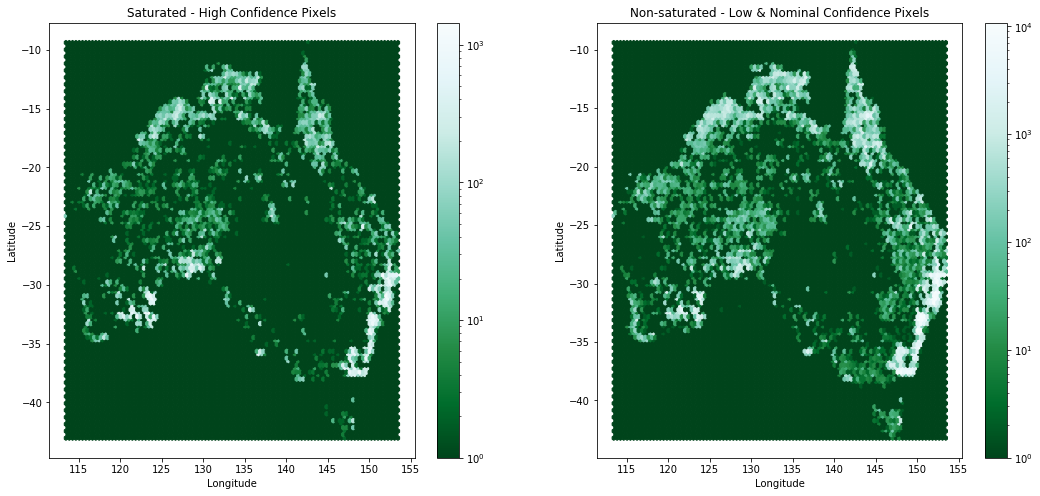

In [162]:

saturated_bright = data[data.confidence == 'h']
s_latitude = saturated_bright['latitude']
s_longitude = saturated_bright['longitude']



unsaturated_bright = data[data.confidence != 'h']
u_latitude = unsaturated_bright['latitude']
u_longitude = unsaturated_bright['longitude']


fig, ax = plt.subplots(1, 2, figsize=(18, 8))

im1 = ax[0].hexbin(s_longitude, s_latitude, bins = 'log', cmap=plt.cm.BuGn_r)
im2 = ax[1].hexbin(u_longitude, u_latitude, bins = 'log', cmap=plt.cm.BuGn_r)
ax[0].set_title('Saturated - High Confidence Pixels')
ax[1].set_title('Non-saturated - Low & Nominal Confidence Pixels')
ax[0].set(xlabel = 'Longitude')
ax[0].set(ylabel = 'Latitude')
ax[1].set(xlabel = 'Longitude')
ax[1].set(ylabel = 'Latitude')

plt.colorbar(im1, ax=ax[0])
plt.colorbar(im2, ax=ax[1])



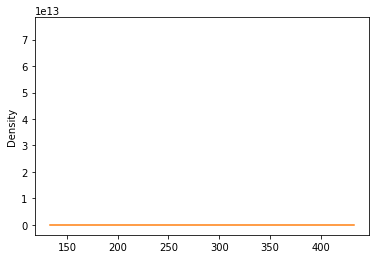

In [29]:
saturated = data[data.bright_ti4 == 367.0]
unsaturated = data[data.bright_ti4 != 367.0]

d_s = saturated['bright_ti4']
d_u = unsaturated['bright_ti4']

# fig, ax = plt.subplots(1, 2, figsize=(18, 8))

d_s.plot.kde()
d_u.plot.kde()
